The anharmonic Hamiltonian is

$H\left(q,p\right)=\frac{p^{2}}{2m}+\frac{m\omega_{0}^{2}}{2}q^{2}+\lambda\left(\frac{p^{2}}{2m}+\frac{m\omega_{0}^{2}}{2}q^{2}\right)^{2}$

The Hamiltonian equation is

$\dot{q}=\frac{\partial H\left(q,p\right)}{\partial p}=\frac{p}{m}+2\lambda\frac{p}{m}\left(\frac{p^{2}}{2m}+\frac{m\omega_{0}^{2}}{2}q^{2}\right)$

$\dot{p}=-\frac{\partial H\left(q,p\right)}{\partial q}=-m\omega_{0}^{2}q-2\lambda m\omega_{0}^{2}q\left(\frac{p^{2}}{2m}+\frac{m\omega_{0}^{2}}{2}q^{2}\right)$

Assumed that, the solution form is

$q=q_{0}\cos\left(\omega t+\phi_{0}\right)$

$p=m\omega_{0}q_{0}\sin\left(\omega t+\phi_{0}\right)$

$\frac{p^{2}}{2m}+\frac{m\omega_{0}^{2}}{2}q^{2}=m\omega_{0}^{2}q_{0}^{2}=E_{0}$

The Hamiltonian equation becomes

$\dot{q}=\frac{\partial H\left(q,p\right)}{\partial p}=\left(1+2\lambda E_{0}\right)\frac{p}{m}$

$\dot{p}=-\frac{\partial H\left(q,p\right)}{\partial q}=-\left(1+2\lambda E_{0}\right)m\omega_{0}^{2}q$

The solution is

$q=q_{0}\cos\left[\left(1+2\lambda E_{0}\right)\omega_{0}t+\phi_{0}\right]$

$p=m\omega_{0}q_{0}\sin\left[\left(1+2\lambda E_{0}\right)\omega_{0}t+\phi_{0}\right]$

The generating function is belong to the type two. Therefore,

$\frac{\partial F_{2}}{\partial q}=p=P+3a^{2}q^{2}P+bP^{3}$

$\frac{\partial F_{2}}{\partial P}=Q=q\left(1+aq^{2}+3bP^{2}\right)$

because $a\ll1$ and $b\ll1$

$q\approx Q\left[1-aQ^{2}-3bP^{2}\right]$

$p\approx P\left(1+3a^{2}Q^{2}+bP^{2}\right)$

and Kamiltonian is

$H=K$

$K=\frac{P^{2}}{2m}\left(1+3aQ^{2}+bP^{2}\right)^{2}+\frac{m\omega_{0}^{2}Q^{2}}{2}\left(1-aQ^{2}-3bP^{2}\right)^{2}+\beta Q^{4}\left(1+aQ^{2}+3bP^{2}\right)^{4}$

because $a\ll1$, $\beta\ll\omega_{0}$and $b\ll1$

$K\approx\frac{P^{2}}{2m}\left(1+6aQ^{2}+2bP^{2}\right)+\frac{m\omega_{0}^{2}Q^{2}}{2}\left(1-2aQ^{2}-6bP^{2}\right)+\beta Q^{4}$

$K\approx\frac{P^{2}}{2m}+\frac{m\omega_{0}^{2}Q^{2}}{2}+\left(\beta-am\omega_{0}^{2}\right)Q^{4}+\left(\frac{3a}{m}-3m\omega_{0}^{2}b\right)Q^{2}P^{2}+\frac{bP^{4}}{m}$

To pick suitable $a$ and $b$, we can select like this way

$\left(\beta-am\omega_{0}^{2}\right)=\frac{m^{2}\omega_{0}^{2}}{2}\left(\frac{3a}{m}-3m\omega_{0}^{2}b\right)$

$\left(\frac{3a}{m}-3m\omega_{0}^{2}b\right)=2m\omega_{0}^{2}b$

Therefore, $a$ and $b$ are

$b=\frac{3\beta}{8m^{3}\omega_{0}^{4}}$

$a=\frac{5\beta}{8m\omega_{0}^{2}}$

The Kamiltonian is

$K\approx\frac{P^{2}}{2m}+\frac{m\omega_{0}^{2}Q^{2}}{2}+\frac{3}{8}\beta Q^{4}+\frac{3\beta}{4m^{2}\omega_{0}^{2}}Q^{2}P^{2}+\frac{3\beta P^{4}}{8m^{4}\omega_{0}^{4}}$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [13]:
def f_int(x, t, b, m, o):
    return [x[1]/m, -m*(o**2)*x[0]-4*b*x[0]*x[0]*x[0]]

def solx(b, m, o, t):
    X=np.cos((1+3*b/(m*(o**2)))*o*t)
    P=m*o*np.sin((1+3*b/(m*(o**2)))*o*t)
    a=5*b/(8*m*o*o)
    bb=3*b/(8*(m*o*o)**2)
    return X*(1-a*X*X-3*b*P*P)

def solp(b, m, o, t):
    X=np.cos((1+3*b/(m*(o**2)))*o*t)
    P=m*o*np.sin((1+3*b/(m*(o**2)))*o*t)
    a=5*b/(8*m*o*o)
    bb=3*b/(8*(m*o*o)**2)
    return -P*(1+3*a*X*X+b*P*P)

Assumed that $Q_{0}=1$, $m=1$, $\omega=1$ and $\beta=0.001$

No handles with labels found to put in legend.


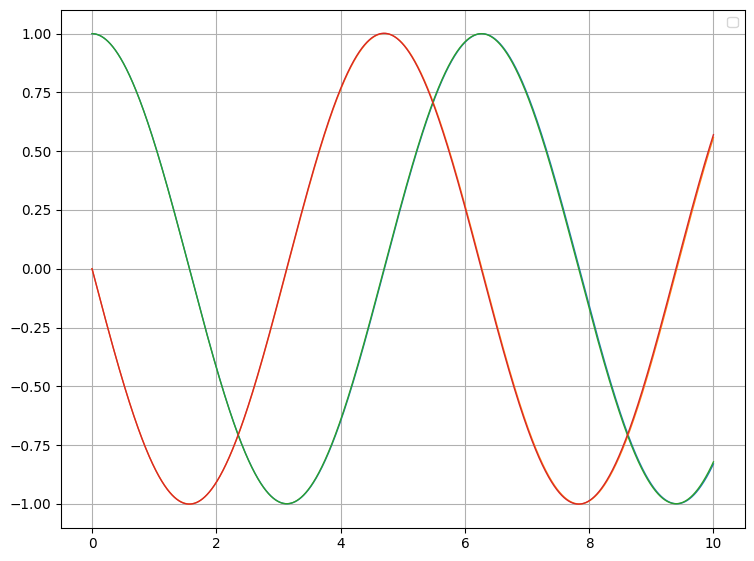

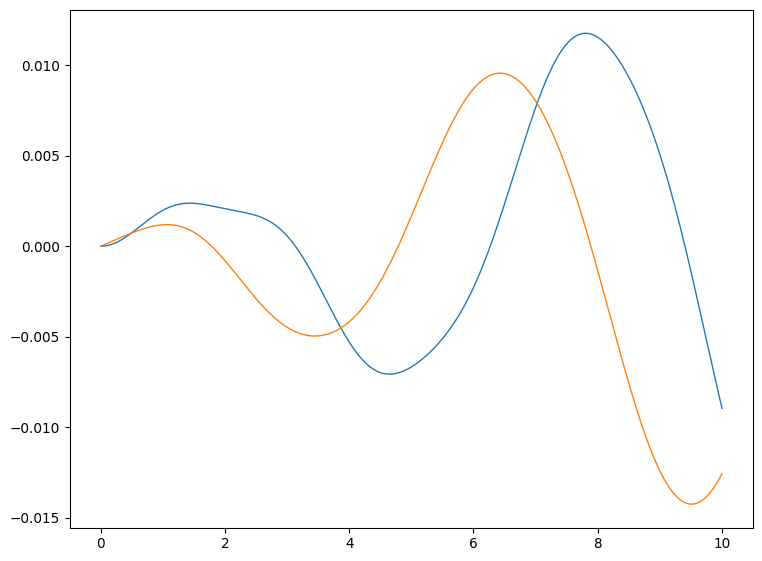

In [10]:
x_0 = np.array([0.999375,0])
t=np.linspace(0.0, 10.0,1000000)
y_sol = odeint(f_int, x_0, t, args=(0.001,1,1))
plt.figure(figsize=(9,7),dpi=98)
plt.plot(t, y_sol,linewidth=1)
plt.plot(t, solx(0.001, 1, 1, t),linewidth=1)
plt.plot(t, solp(0.001, 1, 1, t),linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(9,7),dpi=98)
plt.plot(t, y_sol[:,0]-solx(0.001, 1, 1, t),linewidth=1)
plt.plot(t, y_sol[:,1]-solp(0.001, 1, 1, t),linewidth=1)
plt.show()

Assumed that $Q_{0}=1$, $m=1$, $\omega=2$ and $\beta=0.001$

In [11]:
bb=3*0.001/(8*(1*4)**2)
print(1-5*bb/(8*1*2*2)) 

0.999996337890625


No handles with labels found to put in legend.


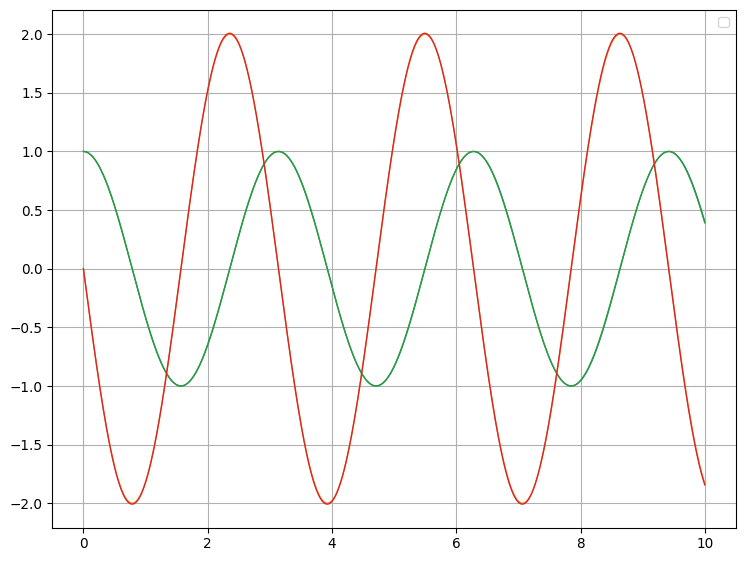

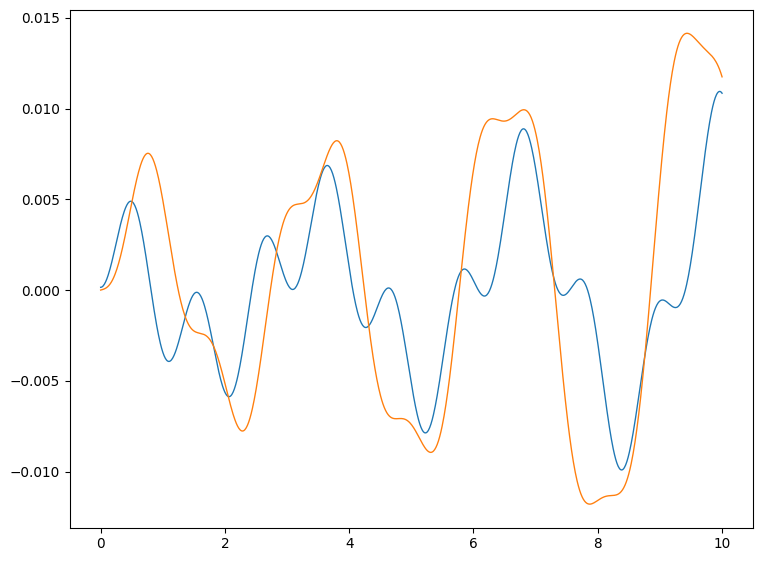

In [12]:

x_0 = np.array([0.999996337890625,0])
t=np.linspace(0.0, 10.0,1000)
y_sol = odeint(f_int, x_0, t, args=(0.001,1,2))
plt.figure(figsize=(9,7),dpi=98)
plt.plot(t, y_sol,linewidth=1)
plt.plot(t, solx(0.001, 1, 2, t),linewidth=1)
plt.plot(t, solp(0.001, 1, 2, t),linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(9,7),dpi=98)
plt.plot(t, y_sol[:,0]-solx(0.001, 1, 2, t),linewidth=1)
plt.plot(t, y_sol[:,1]-solp(0.001, 1, 2, t),linewidth=1)
plt.show()